<a href="https://colab.research.google.com/github/ndbellew/KompyuterM3chakrs/blob/master/Tensorflow-Keras/Text_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with Movie Reviews
 Tutorial 2 in [Tensorflow Keras Tutorial](https://www.tensorflow.org/tutorials/keras/basic_text_classification)
 
__tensor__ - a mathematicl object represented by an array of components that are functions of the coordinates of some space.

## Important Files Needed

In [1]:
!pip install -q tf_nightly

     |████████████████████████████████| 100.1MB 144kB/s 
     |████████████████████████████████| 3.9MB 36.2MB/s 
     |████████████████████████████████| 61kB 23.6MB/s 
     |████████████████████████████████| 501kB 40.9MB/s 


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.15.0-dev20190713


## Download Dataset
We are using the IMDB dataset that comes with TensorFlow itself. keras comes with a variety of datasets.


In [3]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


## Explore the Data
Format the data 

In [5]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [7]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

## Convert the Integers Back to Words
What do these numbers mean? What are we computers? lets make these words so we atleast know what is kind of happening.

In [9]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
# Decode_review function is used to display the text for each review.
decode_review(train_data[0])# first review


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## Prepare the Data
Each review is stored as an array of integers, and must be converted to tensors before fed into the neural network. 
There are two ways to convert

1. Convert the Arrays into vectors of 0s and 1s indicating word occurrence, similar to a one-hot encoding.
1. Pad the arrays so they all have the same length, then create an integer tensor of a the shape *max_length * num_reviews* This can be doen with an embedded layer capable of handlign the shape as the first layer in our network.

This Tutorial will use the padding option of the approach.

From here we will use pad_sequences


In [0]:
# remember to always setup train_data and test_data
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [14]:
# the prior lengths that was run above was (218, 189) but now
len(train_data[0]), len(train_data[1])

(256, 256)

In [15]:
# the now padded first review looks like
print(train_data[0])


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

Even though it is the exact same, the padding ensures a better form of readability for humans, TensorFlow will read through regardless of how we want to read it. 

## Build the Model
Each neural network is created by stacking layers which requires two main architectural decisions

* How many layers to use in the model?
* How many _hidden units_ to use for each layer.

In [16]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0713 17:15:52.135211 140566998919040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 17:15:52.160843 140566998919040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1628: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### Notation - Layers
The layers are stacked sequentially to build the classifier. There are 4 Layers seen here.

1. The first layer is an __Embedding__ layer. This layer translates the integer-encoded vocabulary to the corresponding embedding vector for each word-index. These vectors are learned throughout the model training. The vectors add a dimension to the output array. The 3 resuliting dimensions are the __(batch, sequence, embedding)__. 
1. The next layer is the __GlobalAveragePooling1D__ layer, which returns a fixed-length output vector for each example. This is down by averaging over teh sequence dimension which will allow the model to handle input of variable length while maintaining simplicity.
1.  The Next layer added (model.add(keras.layers.Dense(16, activation=tf.nn.relu))) is the fixed-length output vecotr which is piped through a fully-connected __Dense__ layer containing 16 _hidden units_
1. The final layer is another __Dense__ layer that is connected with a single output node. It uses the __sigmoid__ activation function, which contains a value between 0 and 1 that represnets the probability or confidence level.

#### Hidden Units
What are Hidden Units? Where are THEY HIDING???
Our model has two indermediate layers also called _hidden layers_, between the input and output. The number of outputs (the units, nodes, or neurons) is the dimension of the repsentational space for the layer. to put it simply, the amount of freedm the network is allowed when learning an internal representation. -- if that is simple for you.

Essentially the more hidden units a model has and/or the more layers, then the network can learn more complex representations. That said, it makes the network more computationally expensive and may lead to unwanted patterns -- Patterns that imporve performance on training data but not for the test data, this is known as _overfitting_. 

The trade off we have is time and accuracy vs. complexity.

##### Loss function and Optimizer

Models generally need the loss function and an optimizer for training. Because we are using a binary classification problem and the model outputs some probability (a single-unit layer with a __sigmoid__ activation), we will use the __binary_crossentropy__ loss function. 

Obvious choice right? there are a few chocies for loss-functions, we could also choose the __mean_squared_error__ loss function. But, generally __binary_crossentropy__ is better for dealing with probabilities beacuse it measures the "distance" between probability distributions, or in this case, between the ground-truth distribution and the predictions.

The time to look for another loss function woubld be in regression problems, say if we are to predict the price of a house, generally the price of a house is not True or False, its a range.



In [0]:
# Now to configure the model to use an optimizer and loss function through the compiler.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

## Create a Validation Set
A validation set is used to check the accuracy of the model, if it doesn't know it fails, then how will it learn? The goal is to develop and tune our training model  so that we only need to use the test data once to evaluate our accuracy.

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Train the Model
Everyone's favorite part. For this one we will be using about 40 epochs in mini-batches of 512 samples. An epoch in this instance is an iteration over all samples in the __x_train__ and __y_train__. while training we need to monitor the model's loss and accuracy on the 10k samples from the validation set.


In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

W0713 17:39:11.998254 140566998919040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:454: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 62us/sample - loss: 0.6924 - acc: 0.5139 - val_loss: 0.6912 - val_acc: 0.5091
Epoch 2/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6882 - acc: 0.6353 - val_loss: 0.6846 - val_acc: 0.7063
Epoch 3/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6765 - acc: 0.7497 - val_loss: 0.6689 - val_acc: 0.7553
Epoch 4/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6543 - acc: 0.7559 - val_loss: 0.6428 - val_acc: 0.7606
Epoch 5/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6200 - acc: 0.7882 - val_loss: 0.6064 - val_acc: 0.7846
Epoch 6/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.5756 - acc: 0.8121 - val_loss: 0.5633 - val_acc: 0.8026
Epoch 7/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.5255 - acc: 0.8274 - val_loss: 0.

Behold the evidence of education in our system, the loss decreases and the accuracy increases as the model spends more time learning the processes. The more epochs, the more time spent training, the more accurate it becomes. Its important to find the sweet spot where accuracy is enough where we aren't using thousands of epochs.

## Evaluate the Model
Alright we trained our model lets see if its ready for corporate work.


In [21]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 39us/sample - loss: 0.3360 - acc: 0.8710
[0.335972261838913, 0.87096]


This is a fairly simple approach which achieves about 87% accuracy, the more advanced approaches will often yeild a 95% accuracy.

## Create a Graph
> A graph of accuracy and loss over time
**model.fit()**  returns a __History__ object that contains a dictionary with everything that happened during training:

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

There are four entries, one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy.

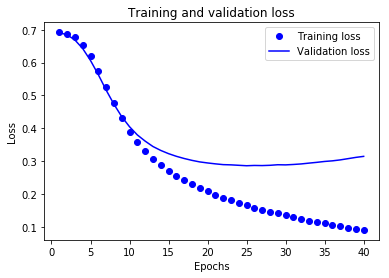

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

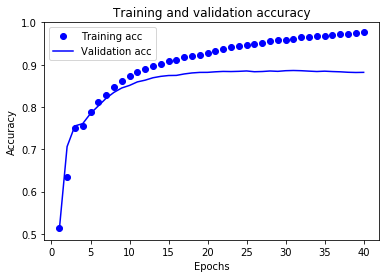

In [24]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


in this plot the dots represent the training loss and accuracy, and the solid lines are the validaton loss and accuracy.
With each epoch loss decreases, this is expected when using descent optimiztion -  it should minimize the desired quantitity on every iteration.

As i said earlyier you need to find the sweet spot for the epoch level, as you can see here the validation accuracy and loss peak at about 20 epochs. This is an example of _overfitting_ we setup too many epochs for what our method could handle and therefore the other 20 epochs were wasted computation and time. The model has over-optimized and learned representations that is only specific to the training data that does not generalize to test data. 

in this particular case, we could prevent overfitting simply by stoppping training after 20 epochs, which could be done automatically with a callback.

In [0]:
#This is not my original work
#
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.